In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dtype = {'file': str,
         'line': str,
         'tokens': str,
         'subject': str,
         'duration': int,
         'nSFD': float,
         'nFFD': float,
         'nGD': float,
         'nTT': float,
         'PrF': float,
         'Pr1': float,
         'Pr2': float,
         'PrS': float,
         'length': int,
         'wpm': float}

df = pd.read_csv("EZReader_Filtered_Result_Line_Level.csv", dtype=dtype)

In [3]:
df

,Unnamed: 0,file,line,tokens,subject,duration,nSFD,nFFD,nGD,nTT,PrF,Pr1,Pr2,PrS,length,wpm
0,0,11,12,NaN,001,3556,NaN,32.914484,32.914484,100.328770,3.000000,0.500000,2.500000,-2.000000,0,0.0
1,1,11,13,NaN,001,1585,NaN,53.780000,53.780000,73.113333,2.500000,2.000000,0.500000,-1.500000,0,0.0
2,2,11,2,NaN,001,4013,NaN,52.490136,52.490136,136.861905,3.500000,0.500000,3.000000,-2.500000,0,0.0
3,3,11,3,NaN,001,2598,NaN,61.333333,61.333333,123.916667,3.500000,0.500000,3.000000,-2.500000,0,0.0
4,4,11,4,NaN,001,2205,NaN,49.544444,49.544444,98.366667,3.000000,1.000000,2.000000,-2.000000,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41795,41795,92,20,NaN,314,2320,NaN,79.569444,79.569444,115.150926,0.545455,0.272727,0.272727,0.454545,0,0.0
41796,41796,92,21,NaN,314,1365,NaN,80.800000,80.800000,102.800000,0.454545,0.363636,0.090909,0.545455,0,0.0
41797,41797,92,23,NaN,314,1560,NaN,46.873333,46.873333,73.263333,0.454545,0.181818,0.272727,0.545455,0,0.0
41798,41798,92,24,NaN,314,2087,NaN,64.219444,64.219444,106.519444,0.545455,0.363636,0.181818,0.454545,0,0.0


In [4]:
ids = ['016', '043', '063', '128', '152', '180', '192', '196', '207', '215', '216', '259', '288', '314']

In [9]:
df = df[df['subject'].isin(ids)]

In [10]:
data = df[['nFFD', 'nGD', 'nTT', 'PrF', 'Pr1', 'Pr2', 'PrS', 'wpm']]
target = df['subject']

In [11]:
# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [12]:
data = data.drop(data[to_drop], axis=1)

In [13]:
data = pd.DataFrame(data=StandardScaler().fit_transform(data), columns=data.columns, index=data.index)

In [14]:
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.2)

In [15]:
print("train data:", train_data.shape)
print("train data:", test_data.shape)
print('train target:', train_target.shape)
print('test target:', test_target.shape)

train data: (4814, 6)
train data: (1204, 6)
train target: (4814,)
test target: (1204,)


In [16]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
accuracy = []
clf = RandomForestClassifier(max_depth=5)
clf.fit(train_data, train_target)
accuracy.append(statistics.mean(cross_val_score(clf, train_data, train_target, cv=10, scoring="accuracy")))

In [24]:
accuracy

[0.09970497148920386]

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import plot_confusion_matrix

from tqdm import tqdm

In [26]:
names = ["Nearest\nNeighbors", "Linear\nSVM", "RBF\nSVM", "Gaussian\nProcess",
         "Decision\nTree", "Random\nForest", "Neural\nNetwork", "AdaBoost",
         "Naive\nBayes"]

classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB()]

In [ ]:
accuracy, precision, recall, f1, confusion = [], [], [], [], []

for name, clf in tqdm(zip(names, classifiers)):
    train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.25)
    clf.fit(train_data, train_target)
    
    accuracy.append(statistics.mean(cross_val_score(clf, train_data, train_target, cv=10, scoring="accuracy")))
    
#     test_predict = cross_val_predict(clf, test_data, test_target, cv=10)
#     precision.append(precision_score(test_target, test_predict, pos_label='152'))
#     recall.append(recall_score(test_target, test_predict, pos_label='152'))
#     f1.append(f1_score(test_target, test_predict, pos_label='152'))
    
#     confusion.append(confusion_matrix(test_target, test_predict))

3it [00:18,  7.57s/it]

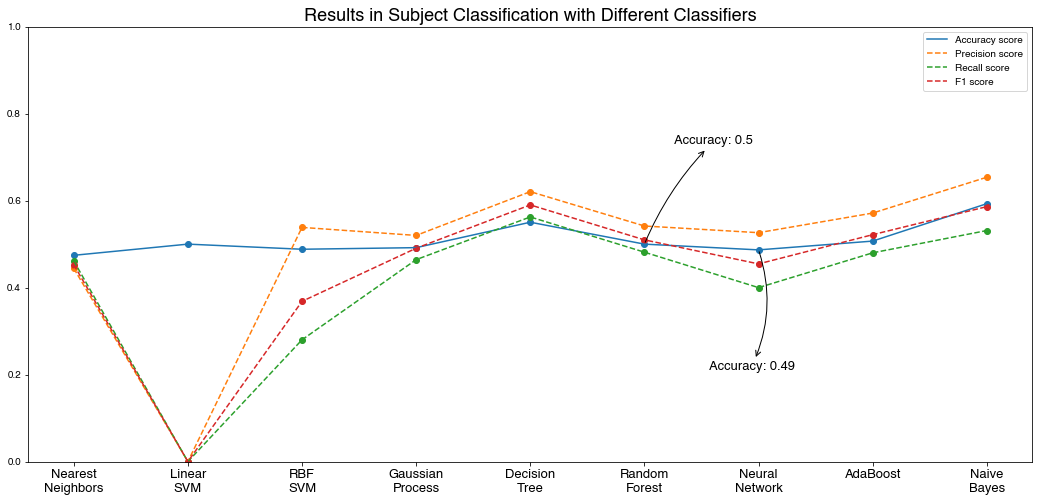

In [92]:
plt.rcParams["font.family"] = "Helvetica"

fig, ax = plt.subplots(figsize=(18,8))

ax.plot(names, accuracy, label='Accuracy score')
# ax.plot(names, precision, linestyle='dashed', label='Precision score')
# ax.plot(names, recall, linestyle='dashed', label='Recall score')
# ax.plot(names, f1, linestyle='dashed', label='F1 score')

ax.scatter(names, accuracy)
# ax.scatter(names, precision)
# ax.scatter(names, recall)
# ax.scatter(names, f1)
# ax.legend(frameon=True)
plt.xticks(fontsize=13)

plt.ylim((0.0,1.0))

plt.annotate(f'Accuracy: {round(accuracy[5], 2)}',xy=(names[5], accuracy[5]),xytext=(+30,100), textcoords='offset points', fontsize=13,
             arrowprops=dict(arrowstyle='<-', connectionstyle='arc3,rad=.1'))

plt.annotate(f'Accuracy: {round(accuracy[6], 2)}',xy=(names[6], accuracy[6]),xytext=(-50,-120), textcoords='offset points', fontsize=13,
             arrowprops=dict(arrowstyle='<-', connectionstyle='arc3,rad=.2'))

ax.set_title("Results in Subject Classification with Different Classifiers", fontsize=18);